## Prediction of Career Lengths of NBA Players

The dataset details the performance metrics of NBA players and whether their careers span more than 5 years or not. 

### Aim
The task is to predict whether the careers of these players will span for more than 5 years or less.


### Feature descriptions:
The dataset contains columns giving values for points attained by NBA players in their careers. The description of the features is as given below


|Features|Description|
|----|----|
|Name| Name of the Player|
|Games Played|Number of Games Played by the player|
|Minutes| Minutes Played
|Points| Points Per Game|
|Field Goals Made| Successful field goals made|
|Field Goals Attempted | Field goals attempted |
|Field Goals Percentage | Percentage of successful field goals out of the field goals attempted|
|3 Pointers Made| Successful 3 pointer attempts|
|3 Pointers Attempted | Total 3 pointers attempted|
|3 Pointers Percentage | Percentage of successful 3 pointers out of those attempted|
|Free Throws Made| Successful number of free throws | 
|Free Throws Attempted| Total attempted number of free throws|
|Free Throw Percentage| Successful number of free throws out of those attempted|
|OREB|Offesnisve Rebounds|
|DREB|Defensive Rebounds |
|REB|Rebounds|
|AST|Assists|
|STL|Steals|
|BLK|Number of blocks|
|TOV |Number of Turnovers|
|Play for more than 5 years or less| 1 if career length is greater than 5 years else 0 if career length is less than 5 years|

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split



from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
pd.set_option('display.max_columns',None)

from scipy.stats import norm, skew

### Read the data. List the categorical and continuous features in the dataset. Find the number of null values in every feature and impute them appropriately. 

In [2]:
# Read the data
df = pd.read_csv('NBA_players.csv')

In [3]:
df.head()

,Name,Games Played,Minutes,Points,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3 Pointers Made,3 Pointers Attempted,3 Pointers Percentage,Free Throws Made,Free Throws Attempted,Fre Throw Percentage,OREB,DREB,REB,AST,STL,BLK,TOV,Play for more than 5 years or less
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

In [5]:
df['3 Pointers Percentage'].fillna(0, inplace=True)

In [6]:
df.isna().sum()

Name                                  0
Games Played                          0
Minutes                               0
Points                                0
Field Goals Made                      0
Field Goals Attempted                 0
Field Goals Percentage                0
3 Pointers Made                       0
3 Pointers Attempted                  0
3 Pointers Percentage                 0
Free Throws Made                      0
Free Throws Attempted                 0
Fre Throw Percentage                  0
OREB                                  0
DREB                                  0
REB                                   0
AST                                   0
STL                                   0
BLK                                   0
TOV                                   0
Play for more than 5 years or less    0
dtype: int64

### Seperate the independent features and target

In [7]:
X = df.iloc[ : , 1 : -1]

In [8]:
y = df.iloc[ : , -1]

### Check for class distribution in the target

In [9]:
y.value_counts()

1.0    831
0.0    509
Name: Play for more than 5 years or less, dtype: int64

### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

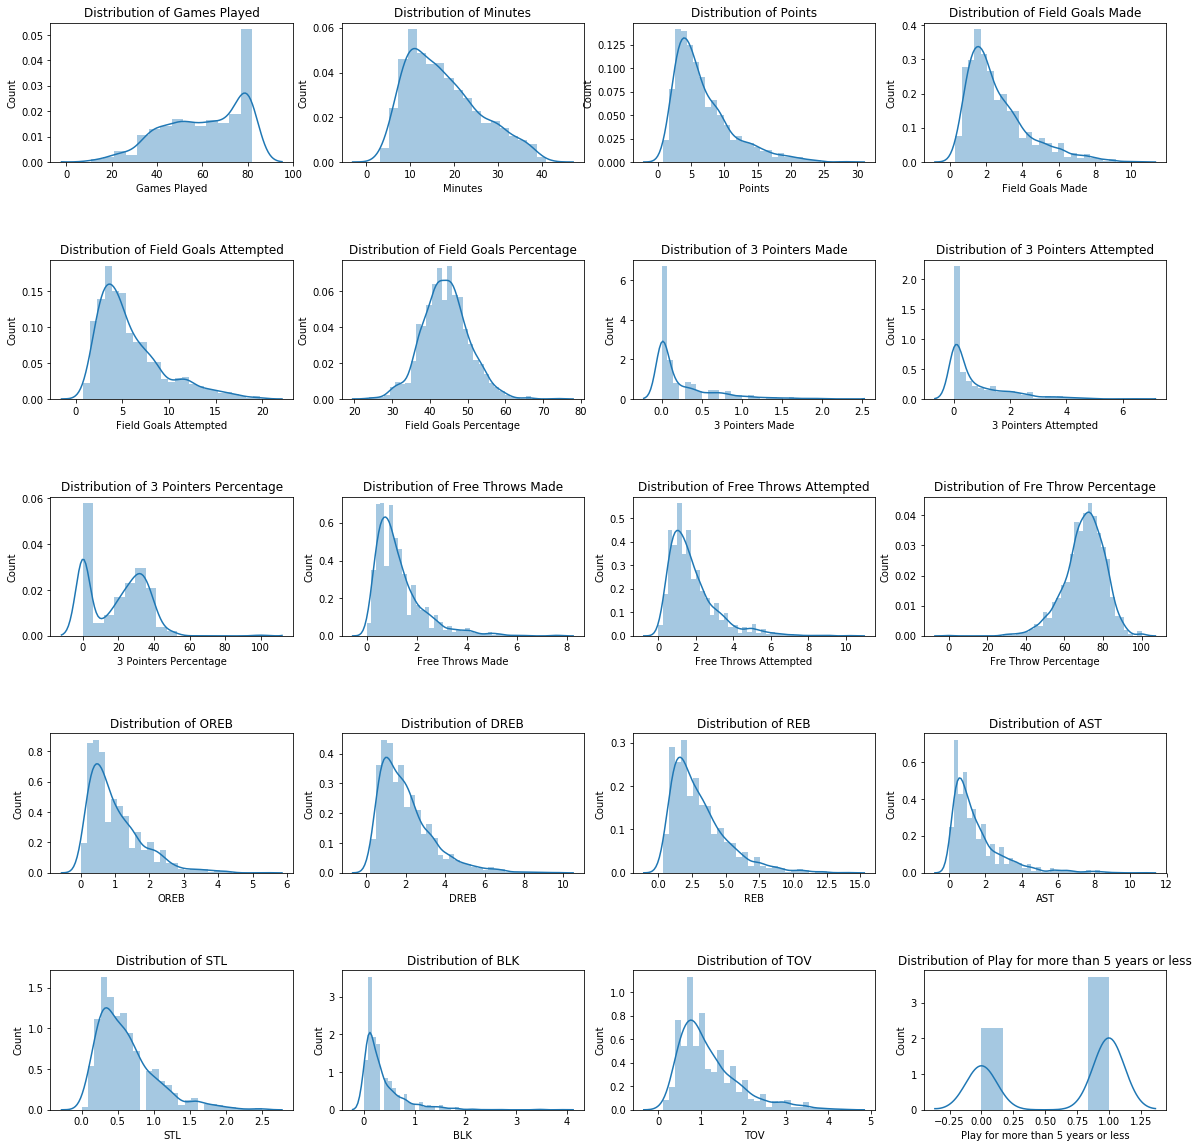

In [10]:
fig, axes = plt.subplots(nrows = 5, ncols=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.7)
for i , j in np.ndindex(axes.shape):
    col = num.columns[4*i + j]
    sns.distplot(a=df[col], ax = axes[i, j])
    axes[i, j].set(title='Distribution of {}'.format(col), ylabel='Count')

### Let's check the amount of skewness in our continuous predictors and depending on the type of skewness, let's apply the necessary transformations for removing the skewness

In [11]:
df.skew()[(df.skew() > 1 ) | (df.skew() < -1)]

Points                   1.388224
Field Goals Made         1.342544
Field Goals Attempted    1.295881
3 Pointers Made          2.032815
3 Pointers Attempted     1.812435
Free Throws Made         1.941999
Free Throws Attempted    1.844482
OREB                     1.439584
DREB                     1.488681
REB                      1.481736
AST                      2.132817
STL                      1.364800
BLK                      2.804152
TOV                      1.340741
dtype: float64

In [12]:
for col in num :
    if skew(num[col]) > 1 :
        X[col] = np.log1p(X[col])

In [13]:
X.skew()

Games Played             -0.477743
Minutes                   0.632257
Points                    0.211938
Field Goals Made          0.389727
Field Goals Attempted     0.271205
Field Goals Percentage    0.208479
3 Pointers Made           1.445824
3 Pointers Attempted      0.961048
3 Pointers Percentage     0.301290
Free Throws Made          0.710816
Free Throws Attempted     0.544728
Fre Throw Percentage     -0.767863
OREB                      0.570614
DREB                      0.394861
REB                       0.319552
AST                       0.762428
STL                       0.699487
BLK                       1.511384
TOV                       0.561616
dtype: float64

KeyError: 'Play for more than 5 years or less'

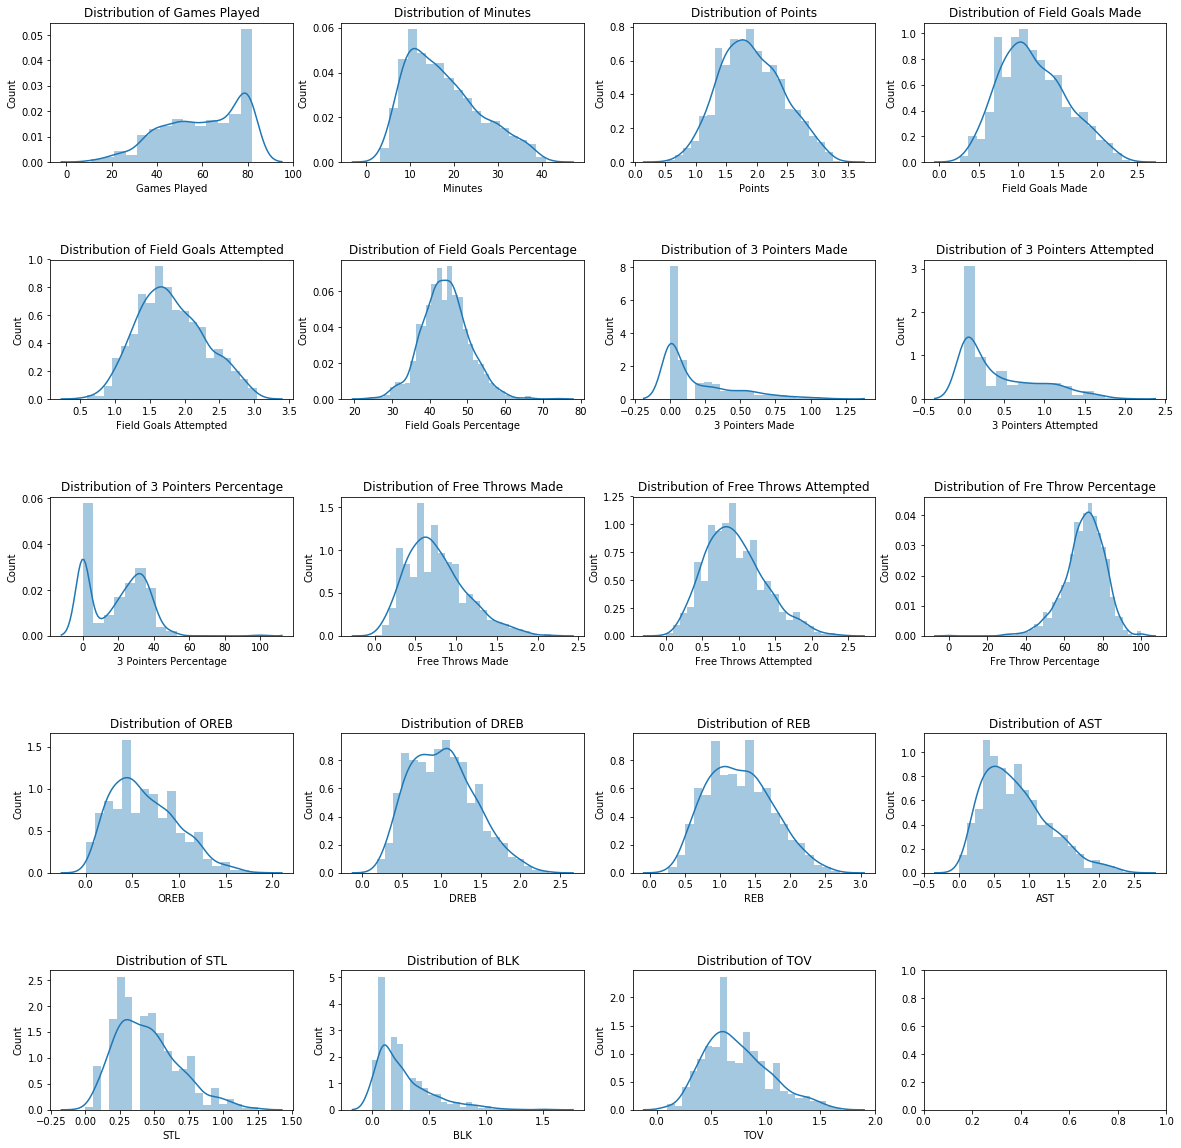

In [34]:
fig, axes = plt.subplots(nrows = 5, ncols=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.7)
for i , j in np.ndindex(axes.shape):
    col = num.columns[4*i + j]
    sns.distplot(a=X[col], ax = axes[i, j])
    axes[i, j].set(title='Distribution of {}'.format(col), ylabel='Count')

### Split train and test data into X_train ,y_train,X_test and y_test data and apply a vanilla logistic regression model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [15]:
logreg = LogisticRegression()

In [16]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred_logreg = logreg.predict(X_test)

In [18]:
logreg.score(X_test, y_test)

0.7313432835820896

In [19]:
roc_auc_score(y_test, y_pred_logreg)

0.6925422138836772

### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy as well as the `roc_auc_score`.

- Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric i.e `roc_auc_score` on the test data. Use parameter `random_state = 42` for results reproducibility.

In [20]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [23]:
dt.score(X_test, y_test)

0.6442786069651741

In [24]:
y_pred_dt = dt.predict(X_test)

In [25]:
roc_auc_score(y_test, y_pred_dt)

0.5873983739837398

### Next let's implement a Stacking Classifier consisting of one Decision Tree and Logistic regression and a  decision tree model as a meta classifier.

###  Now let's apply a Random Forest model
- Let the parameters for the model be `criterion='gini'`, `max_depth= 6`,`max_features= 'auto'`,`n_estimators= 11`

In [26]:
randforclass = RandomForestClassifier(criterion='gini', max_depth=6, max_features='auto', n_estimators=11)

In [27]:
randforclass.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
y_pred_randforclass = randforclass.predict(X_test)

In [29]:
randforclass.score(X_test, y_test)

0.6766169154228856

In [30]:
roc_auc_score(y_test, y_pred_randforclass)

0.640791119449656

### Let's try improving upon the accuracy of the Random Forest using hyperparameter tuning

In [39]:
rfc = RandomForestClassifier()
param_grid = {'n_estimator' : [11, 12, 13], 'max_feature' : ['auto', 'sqrt', 'log2'], 'criterion' : ['gini', 'entropty'],
                 'max_depth' : [4, 5, 6, 7, 8]}

In [40]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10)

### Now let's apply a Voting Classifier that consists of three models - Logistic Regression, Decision Tree and a Random Forest with a soft voting

### Let's check how a bagging classifier using a Decision Tree performs on our data

### Let's now visualize the AUC_ROC scores for all the models in one plot